**Bootcamp** **Data** **Analytics** **2024**

Exercício Teste de Hipóteses - Ana Ribeiro

Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

In [1]:
#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t as t_student
from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from scipy.stats import f_oneway
from scipy.stats import probplot

In [2]:
#Leitura da base de dados
df_test_ab = pd.read_csv("experimento_teste_ab.csv")
df_test_ab.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [3]:
#Tamanho da amostra
df_test_ab.shape[0]

2000

1. Qual dos cenários tem a maior taxa de conversão?


In [4]:
agrupamento = df_test_ab.groupby('Versão_Página').sum()
agrupamento

,Visitante_ID,Visualizações,Conversões
Versão_Página,,,
A,500500,150835,105
B,1500500,150676,125


In [5]:
agrupamento['Taxa_de_conversão'] = taxa_de_conversao = (agrupamento['Conversões'] / agrupamento['Visualizações'])
agrupamento

,Visitante_ID,Visualizações,Conversões,Taxa_de_conversão
Versão_Página,,,,
A,500500,150835,105,0.000696
B,1500500,150676,125,0.000830


**Resposta:** O cenário que possui a maior taxa de conversão é o B.

2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi
aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito da
nova abordagem.

d. O aumento para 10% de conversão.


tamanho da amostra


In [6]:
alpha = 0.05
beta = 1 - 0.8
confianca = 0.95
significancia = 0.05
taxa_de_conversao_A = 0.000696
taxa_de_conversao_ideal = 0.1
delta = taxa_de_conversao_ideal - taxa_de_conversao_A
variancia_estimada = agrupamento['Conversões'].var()


In [7]:
alpha_zscore =stats.norm.ppf(1-alpha/2)
print("Z(1-alpha/2): {}".format(str(alpha_zscore)))

Z(1-alpha/2): 1.959963984540054


In [8]:
beta_zscore =stats.norm.ppf(1-beta)
print("Z(1-beta): {}".format(str(beta_zscore)))

Z(1-beta): 0.8416212335729143


In [9]:
n = (2 * (variancia_estimada) * (alpha_zscore + beta_zscore)**2) / delta**2
print(f'Amostra necessária para um grupo: {int(n)}')

print(f'Amostra necessária para o teste A/B: {int(2*n)}')

Amostra necessária para um grupo: 318371
Amostra necessária para o teste A/B: 636742


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de
dados de um hospital que trata de pacientes com problemas cardíacos.
Considere a base como a população, portanto as estatísticas da população
são conhecidas. Responda as perguntas abaixo:

In [10]:
#Leitura da base de dados
df_pacientes = pd.read_csv('pacientes.csv')
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [11]:
#Tamanho da amostra
df_pacientes.shape[0]

1000

3. Considerando uma amostra de 45 números que representam o index do
dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209,
715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699,
473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505,
273, 957, 362]). Considerando essa amostra é possível dizer que a idade
média das pessoas com problemas cardíacos é maior que 50 anos? Nível
de significância igual a 5%.


In [12]:
indices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362])

In [13]:
df_pacientes.columns

Index(['Unnamed: 0', 'Pressao_Arterial', 'Idade', 'Genero', 'Etnia',
       'Estado_Saude', 'Nome_Genero', 'Nome_Etnia', 'Nome_Estado_Saude'],
      dtype='object')

In [14]:
df_amostra = df_pacientes.loc[df_pacientes['Unnamed: 0'].isin(indices)]
df_amostra

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
36,36,168.708224,41,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
39,39,144.565778,50,0,2,0,Masculino,Hispânico,Saudável
84,84,172.697749,63,0,3,0,Masculino,Asiático,Saudável
89,89,154.485901,41,1,3,0,Feminino,Asiático,Saudável
146,146,157.727254,69,1,0,0,Feminino,Caucasiano,Saudável
184,184,159.939299,47,1,0,0,Feminino,Caucasiano,Saudável
209,209,151.856477,36,0,3,0,Masculino,Asiático,Saudável
217,217,157.458801,60,0,2,0,Masculino,Hispânico,Saudável
222,222,145.933389,64,1,0,0,Feminino,Caucasiano,Saudável
224,224,145.340019,49,0,0,0,Masculino,Caucasiano,Saudável


In [15]:
media_amostra = df_amostra['Idade'].mean()
media_amostra

50.29545454545455

In [16]:
desvio_padrao_amostra = df_amostra['Idade'].std()
desvio_padrao_amostra

11.451778668499687

In [17]:
#h0: idade média das pessoas com problemas cardíacos é maior que 50 anos
#h1: idade média das pessoas com problemas cardíacos é menor ou igual a 50 anos

significancia_amostra = 0.05
confianca_amostra = 1 - significancia_amostra
n = 45
graus_de_liberdade_amostra = n - 1
alpha = significancia_amostra

In [18]:
t_statistic, p_value = ttest_1samp(df_amostra['Idade'], 50)
print(f"Estatística T: {t_statistic}")
print(f"Valor p: {p_value / 2}")  # Dividindo por 2 pois é unicaudal

Estatística T: 0.17113706058137004
Valor p: 0.4324593967869811


In [19]:
if p_value < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não rejeitamos a hipótese nula.')

Não rejeitamos a hipótese nula.


**Resposta:** Com nível de significância de 5%, o H0 não é rejeitado, isto é, concluímos que a idade média das pessoas com problemas cardíacos é maior que 50 anos.

4. Queremos entender que tipo de amostra estamos lidando se dividirmos
os conjuntos em 2, sendo um com pessoas que têm condições de saúde
adicionais e o outro com pessoas saudáveis. Seria dependente ou
independente?

**Resposta:** Como as amostras são de pessoas diferentes, é considerado independente. Mesmo que essas amostras sejam separadas em categorias diferentes, ainda tratam-se de amotras de pessoas diferentes. Caso a amostra tivesse dados das mesmas pessoas comparando as condições de saúde, seria considerado amostra dependente.

5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [20]:
indices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372])

In [21]:
df_amostra = pd.DataFrame(df_pacientes.loc[df_pacientes['Unnamed: 0'].isin(indices)])
df_amostra

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
6,6,150.750643,52,1,2,1,Feminino,Hispânico,Com condições de saúde adicionais
19,19,160.089332,38,1,1,0,Feminino,Afro-americano,Saudável
60,60,161.136755,35,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
67,67,158.427577,45,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
105,105,151.920500,34,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
174,174,148.278546,32,1,1,0,Feminino,Afro-americano,Saudável
201,201,152.837941,64,0,1,0,Masculino,Afro-americano,Saudável
319,319,161.163704,52,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
346,346,164.313189,51,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
354,354,152.429706,57,1,1,0,Feminino,Afro-americano,Saudável


In [22]:
df_amostra_condicao_adicional = df_amostra.query('Nome_Estado_Saude == "Com condições de saúde adicionais"')
media_condicao_adicional = df_amostra_condicao_adicional['Pressao_Arterial'].mean()
media_condicao_adicional

153.1972544980592

In [23]:
df_amostra_condicao_saudavel = df_amostra.query('Nome_Estado_Saude == "Saudável"')
media_condicao_saudavel = df_amostra_condicao_saudavel['Pressao_Arterial'].mean()
media_condicao_saudavel

152.94305165531088

In [24]:
#h0: a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde
#h1: a pressão arterial média para pacientes com condições de saúde adicionais é diferente à pressão arterial média para pacientes sem condições adicionais de saúde

significancia_amostra = 0.06
confianca_amostra = 1 - significancia_amostra
n = df_amostra.shape[0]
graus_de_liberdade_amostra = n - 1
alpha = significancia_amostra

In [25]:
test_condicao_adicional = DescrStatsW(df_amostra_condicao_adicional['Pressao_Arterial'])
test_condicao_saudavel = DescrStatsW(df_amostra_condicao_saudavel['Pressao_Arterial'])

test_adicional_saudavel = CompareMeans(test_condicao_adicional, test_condicao_saudavel)
t, p_valor, df = test_adicional_saudavel.ttest_ind(alternative='larger', value=0)

print(f"Estatística T: {t}")
print(f"Valor p: {p_valor}")

Estatística T: 0.08124024162327208
Valor p: 0.46796230081242784


In [26]:
if p_valor <= alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não rejeitamos a hipótese nula.')

Não rejeitamos a hipótese nula.


**Resposta:** Com nível de significância de 6%, o H0 não é rejeitado, isto é, concluímos que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde.

6. Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.

c. Hipótese Alternativa (H1): Há uma diferença significativa na pressão
arterial média entre pelo menos dois grupos étnicos nesta
população.


In [27]:
df_pacientes['Nome_Etnia'].value_counts()

Nome_Etnia
Afro-americano    260
Hispânico         255
Asiático          252
Caucasiano        233
Name: count, dtype: int64

In [28]:
grupo1 = df_pacientes.query('Nome_Etnia == "Afro-americano"')['Pressao_Arterial']
grupo1

0      142.755809
1      161.878468
12     136.130824
13     138.189136
15     138.546769
          ...    
977    150.981672
986    134.647022
990    163.344808
991    171.550694
999    159.877549
Name: Pressao_Arterial, Length: 260, dtype: float64

In [29]:
grupo1.mean()

150.72755318135705

In [30]:
grupo2 = df_pacientes.query('Nome_Etnia == "Hispânico"')['Pressao_Arterial']
grupo2

4      162.502954
6      150.750643
9      135.927802
14     134.023553
23     147.925276
          ...    
974    157.137332
975    170.380809
979    140.494059
980    146.963257
983    155.136929
Name: Pressao_Arterial, Length: 255, dtype: float64

In [31]:
grupo2.mean()

150.41969686828918

In [32]:
grupo3 = df_pacientes.query('Nome_Etnia == "Asiático"')['Pressao_Arterial']
grupo3

2      161.508259
3      144.979408
7      142.339147
10     161.863980
11     140.521383
          ...    
973    139.194170
978    146.402590
982    143.499911
994    147.660039
996    161.801012
Name: Pressao_Arterial, Length: 252, dtype: float64

In [33]:
grupo3.mean()

150.33089880421758

In [34]:
grupo4 = df_pacientes.query('Nome_Etnia == "Caucasiano"')['Pressao_Arterial']
grupo4

5      153.134713
8      148.453423
20     147.980746
21     136.515909
22     152.737983
          ...    
992    156.381847
993    152.152123
995    136.381404
997    134.390624
998    160.818609
Name: Pressao_Arterial, Length: 233, dtype: float64

In [35]:
grupo4.mean()

149.98304544331813

In [36]:
alpha = 0.05

# Teste ANOVA
f_statistic, p_value = f_oneway(grupo1, grupo2, grupo3, grupo4)

print(f"Estatística F: {f_statistic}")
print(f"Valor p: {p_value}")

Estatística F: 0.23245296261596837
Valor p: 0.873800123850745


In [37]:
if p_value <= alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não rejeitamos a hipótese nula.')

Não rejeitamos a hipótese nula.


**Resposta:** Com nível de significância de 5%, o H0 não é rejeitado, isto é, concluímos que a pressão arterial média é a mesma em todos os grupos étnicos.

b. Existe uma associação entre a idade dos pacientes e sua
pressão arterial?

i. Hipótese Nula (H0): A idade dos pacientes é independente
da pressão arterial.

ii. Hipótese Alternativa (H1): A idade dos pacientes está
associada à sua pressão arterial.

In [38]:
tabela_contingencia = df_pacientes[['Idade', 'Pressao_Arterial']]
tabela_contingencia

,Idade,Pressao_Arterial
0,31,142.755809
1,35,161.878468
2,39,161.508259
3,43,144.979408
4,55,162.502954
...,...,...
995,58,136.381404
996,41,161.801012
997,70,134.390624
998,33,160.818609


In [39]:
from scipy.stats import chi2_contingency
chi2_statistic, p_value, _, _ = chi2_contingency(tabela_contingencia) # cálculo de qui-quadrado

print(f"Estatística Qui-Quadrado: {chi2_statistic}")
print(f"Valor p: {p_value}")

Estatística Qui-Quadrado: 2256.683158822665
Valor p: 6.660411108146578e-99


In [40]:
if p_value <= alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não rejeitamos a hipótese nula.')

Rejeitamos a hipótese nula.


**Resposta:** Com nível de significância de 5%, o H0 é rejeitado, isto é, concluímos que idade dos pacientes está associada à sua pressão arterial.

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de
gênero neste grupo de pacientes. Acredita-se que há uma relação entre
o sexo e condições de saúde adicionais. (Teste qui-quadrado)


In [41]:
#H0: Há uma relação entre o sexo e condições de saúde adicionais.

In [42]:
df_genero_saude = df_pacientes[['Nome_Genero', 'Nome_Estado_Saude']].query('Nome_Estado_Saude == "Com condições de saúde adicionais"')
df_genero_saude

,Nome_Genero,Nome_Estado_Saude
0,Feminino,Com condições de saúde adicionais
2,Masculino,Com condições de saúde adicionais
3,Feminino,Com condições de saúde adicionais
4,Masculino,Com condições de saúde adicionais
6,Feminino,Com condições de saúde adicionais
...,...,...
992,Masculino,Com condições de saúde adicionais
993,Masculino,Com condições de saúde adicionais
994,Feminino,Com condições de saúde adicionais
995,Feminino,Com condições de saúde adicionais


In [43]:
# Criar tabela de contingência
chi = pd.crosstab(df_genero_saude['Nome_Genero'], df_genero_saude['Nome_Estado_Saude'])
chi

Nome_Estado_Saude,Com condições de saúde adicionais
Nome_Genero,
Feminino,257
Masculino,253


In [44]:
chi2_statistic, p_value, _, _ = chi2_contingency(chi)
print(f"Estatística Qui-Quadrado: {chi2_statistic}")
print(f"Valor p: {p_value}")

Estatística Qui-Quadrado: 0.0
Valor p: 1.0


In [45]:
if p_value <= alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não rejeitamos a hipótese nula.')

Não rejeitamos a hipótese nula.


**Resposta:** Após realização do teste Qui-Quadrado, a hipótese nula não foi rejeitada.

8. Qual é o intervalo de confiança para a média da pressão arterial entre os
pacientes com condições de saúde adicionais? (nível de confiança 95%)


In [46]:
dados = df_pacientes[['Pressao_Arterial', 'Nome_Estado_Saude']].query('Nome_Estado_Saude == "Com condições de saúde adicionais"')
dados

,Pressao_Arterial,Nome_Estado_Saude
0,142.755809,Com condições de saúde adicionais
2,161.508259,Com condições de saúde adicionais
3,144.979408,Com condições de saúde adicionais
4,162.502954,Com condições de saúde adicionais
6,150.750643,Com condições de saúde adicionais
...,...,...
992,156.381847,Com condições de saúde adicionais
993,152.152123,Com condições de saúde adicionais
994,147.660039,Com condições de saúde adicionais
995,136.381404,Com condições de saúde adicionais


In [47]:
# Calculando o intervalo de confiança para a média, usando um nível de confiança de 95%
intervalo_confianca = stats.t.interval(0.95, len(dados), loc=np.mean(dados['Pressao_Arterial']), scale=stats.sem(dados['Pressao_Arterial']))

print(f"Intervalo de Confiança para a média da pressão arterial para pacientes com condições de saúde adicionais: {intervalo_confianca}")

Intervalo de Confiança para a média da pressão arterial para pacientes com condições de saúde adicionais: (149.21972863655904, 151.01717525375605)


9. A distribuição da pressão arterial na população segue uma distribuição
normal?

a. Hipótese Nula (H0): A distribuição da pressão arterial na população
segue uma distribuição normal.

b. Hipótese Alternativa (H1): A distribuição da pressão arterial na
população não segue uma distribuição normal

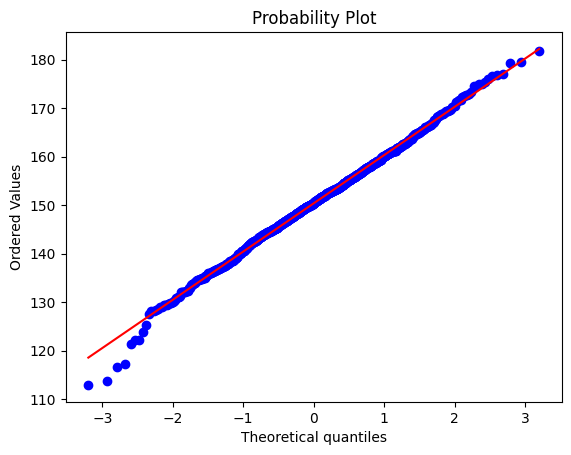

In [48]:
# QQPlot para verificar normalidade
probplot(df_pacientes['Pressao_Arterial'], dist='norm', plot=plt)
plt.show()

**Resposta:** Após plotagem do QQPlot, é possível observar que a maioria dos pontos seguem a linha diagonal, ou seja, representa uma distribuição normal. Há também alguns pontos que se desviam da linha diagonal, sugerindo desvios de normalidade como, por exemplo, indicativos de assimetria, caudas pesadas e outliers.